In [17]:
import ee

In [18]:
ee.Authenticate()
ee.Initialize(project='geospatial-analysis-453812')

In [19]:
# Região de interesse: São Paulo
roi = ee.Geometry.Rectangle([-46.7, -23.8, -46.4, -23.5])

In [20]:
# Filtrar imagens Sentinel-2 na região e no período desejado
sentinel = ee.ImageCollection("COPERNICUS/S2") \
    .filterBounds(roi) \
    .filterDate("2025-01-01", "2025-03-15") \
    .median()  # Criar imagem composta

In [21]:
# Calcular NDWI (Green - B3, NIR - B8)
ndwi = sentinel.normalizedDifference(["B3", "B8"]).rename("NDWI")

In [24]:

# Criar mapa interativo
Map = geemap.Map()
Map.centerObject(roi, 10)

# Adicionar camada NDWI ao mapa
ndwi_viz = {"min": -1, "max": 1, "palette": ["white", "blue"]}
Map.addLayer(ndwi, ndwi_viz, "NDWI - Índice de Água")



In [25]:
task = ee.batch.Export.image.toDrive(
    image=ndwi,
    description="NDWI_SaoPaulo",
    folder="GEE_Exports",
    scale=10,
    region=roi,
    fileFormat="GeoTIFF"
)
task.start()


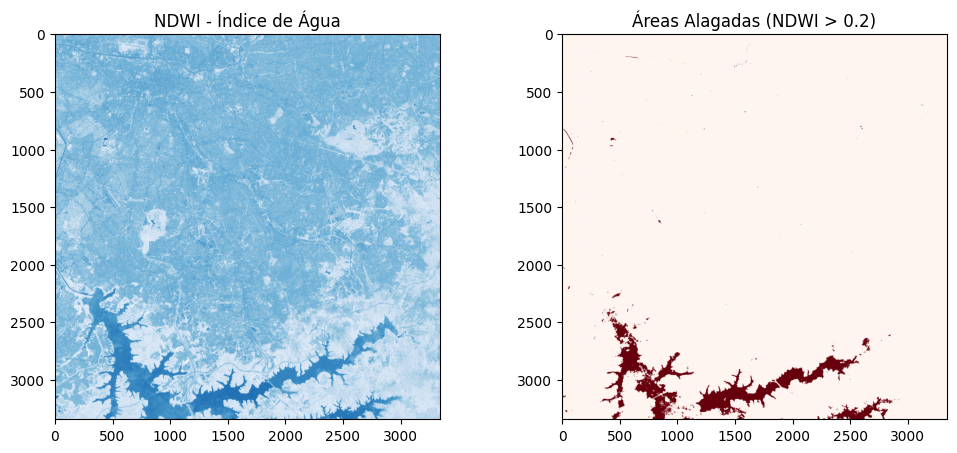

In [35]:
import rasterio
import matplotlib.pyplot as plt

# Abrir o raster exportado
ndwi_raster = rasterio.open("C:/Users/monte/OneDrive/Documentos/codigos/projeto-geospatial-analysis/geospatial-analisys/data/NDWI_SaoPaulo.tif")
ndwi_array = ndwi_raster.read(1)  # Ler a banda NDWI

# Criar máscara para detectar água (NDWI > 0.2)
water_mask = ndwi_array > 0.1

# Plotar o NDWI e as áreas alagadas
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(ndwi_array, cmap="Blues")
ax[0].set_title("NDWI - Índice de Água")
ax[1].imshow(water_mask, cmap="Reds")
ax[1].set_title("Áreas Alagadas (NDWI > 0.2)")
plt.show()
